## 1 DATA

### Read Data

In [3]:
# Importing required libraries
import pandas as pd

# Load the Blueprinty dataset
data = pd.read_csv('blueprinty.csv')

# Inspect the first few rows
data.head()


,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0


### Compare histograms and means of number of patents by customer status. What do you observe?

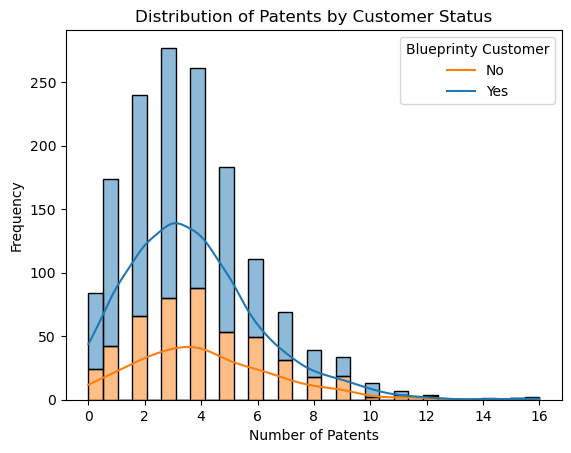

Mean number of patents by customer status:
 iscustomer
0    3.473013
1    4.133056
Name: patents, dtype: float64


In [4]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms comparing patents by customer status
sns.histplot(data=data, x='patents', hue='iscustomer', kde=True, multiple='stack')
plt.title('Distribution of Patents by Customer Status')
plt.xlabel('Number of Patents')
plt.ylabel('Frequency')
plt.legend(title='Blueprinty Customer', labels=['No', 'Yes'])
plt.show()

# Means comparison of patents by customer status
mean_patents = data.groupby('iscustomer')['patents'].mean()
print("Mean number of patents by customer status:\n", mean_patents)


Mean age by customer status:
 iscustomer
0    26.101570
1    26.900208
Name: age, dtype: float64


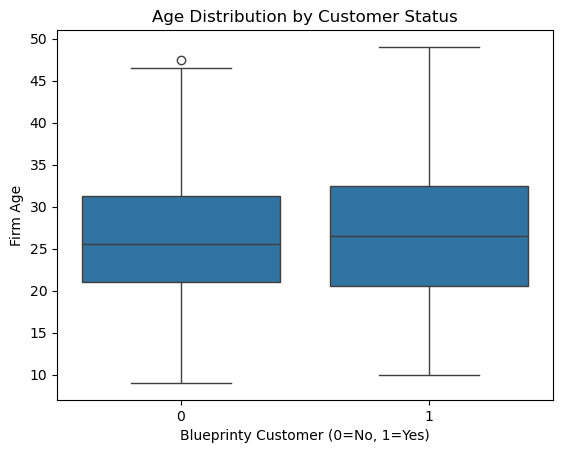

Regional distribution by customer status (column-wise proportion):
 iscustomer         0         1
region                        
Midwest     0.183513  0.076923
Northeast   0.267910  0.681913
Northwest   0.155054  0.060291
South       0.153091  0.072765
Southwest   0.240432  0.108108


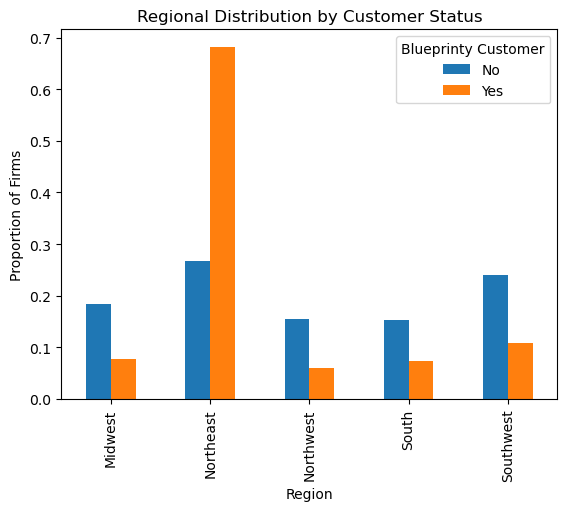

In [5]:
# Comparing age by customer status
mean_age = data.groupby('iscustomer')['age'].mean()
print("Mean age by customer status:\n", mean_age)

# Boxplot of age by customer status
sns.boxplot(x='iscustomer', y='age', data=data)
plt.title('Age Distribution by Customer Status')
plt.xlabel('Blueprinty Customer (0=No, 1=Yes)')
plt.ylabel('Firm Age')
plt.show()

# Comparing region by customer status
region_distribution = pd.crosstab(data['region'], data['iscustomer'], normalize='columns')
print("Regional distribution by customer status (column-wise proportion):\n", region_distribution)

# Bar plot of region by customer status
region_distribution.plot(kind='bar', stacked=False)
plt.title('Regional Distribution by Customer Status')
plt.xlabel('Region')
plt.ylabel('Proportion of Firms')
plt.legend(title='Blueprinty Customer', labels=['No', 'Yes'])
plt.show()


### Compare regions and ages by customer status. What do you observe?

Mean age by customer status:
 iscustomer
0    26.101570
1    26.900208
Name: age, dtype: float64


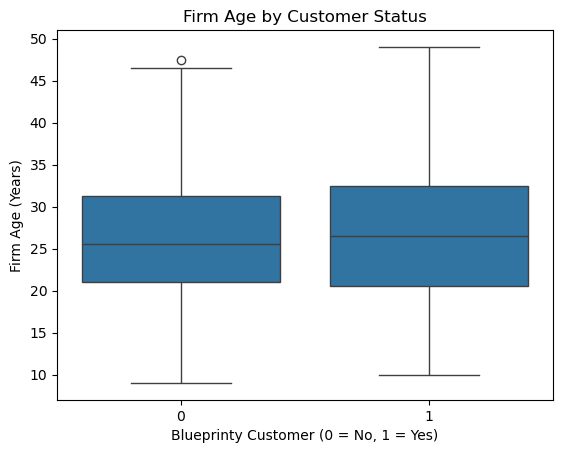

Proportion of firms by region and customer status:
 iscustomer         0         1
region                        
Midwest     0.183513  0.076923
Northeast   0.267910  0.681913
Northwest   0.155054  0.060291
South       0.153091  0.072765
Southwest   0.240432  0.108108


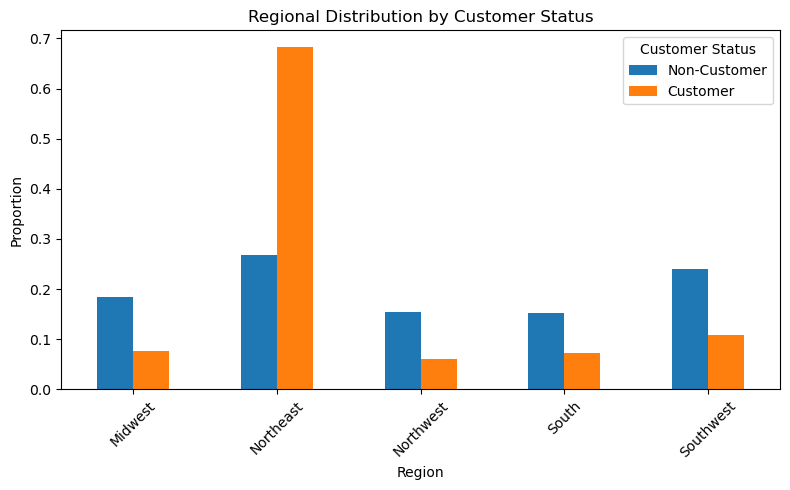

In [6]:
# Grouped mean age by customer status
mean_age = data.groupby('iscustomer')['age'].mean()
print("Mean age by customer status:\n", mean_age)

# Boxplot for visualizing age distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='iscustomer', y='age', data=data)
plt.title('Firm Age by Customer Status')
plt.xlabel('Blueprinty Customer (0 = No, 1 = Yes)')
plt.ylabel('Firm Age (Years)')
plt.show()

# Cross-tab of region by customer status
region_ct = pd.crosstab(data['region'], data['iscustomer'], normalize='columns')
print("Proportion of firms by region and customer status:\n", region_ct)

# Bar plot to visualize regional distribution
region_ct.plot(kind='bar', figsize=(8, 5))
plt.title('Regional Distribution by Customer Status')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(title='Customer Status', labels=['Non-Customer', 'Customer'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Estimation of Simple Poisson Model

### Write down mathematically the likelihood for $Y \sim \text{Poisson}(\lambda)$. Note that $f(Y|\lambda) = e^{-\lambda}\lambda^Y/Y!$.

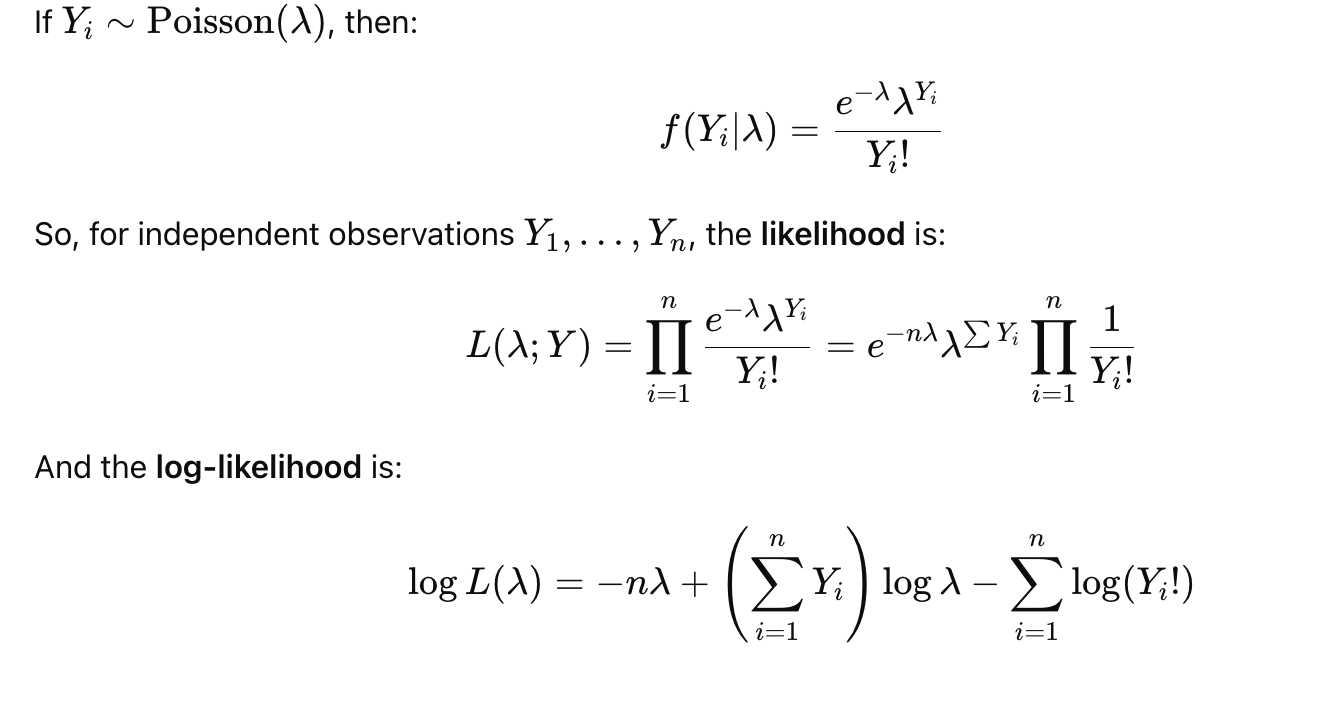

###  Code the likelihood (or log-likelihood) function for the Poisson model. This is a function of lambda and Y. For example:_

```
poisson_loglikelihood <- function(lambda, Y){
   ...
}
```


In [11]:
import numpy as np
from scipy.special import gammaln  # for stable log(Y!) computation

# Define the Poisson log-likelihood function
def poisson_loglikelihood(lam, Y):
    """
    Computes the negative log-likelihood for Poisson model.

    Parameters:
    lam (float): Lambda parameter of the Poisson distribution
    Y (array-like): Array of observed count data (e.g., patents)

    Returns:
    float: Negative log-likelihood (for use with optimizers)
    """
    if lam <= 0:
        return np.inf  # to handle invalid (non-positive) lambda

    n = len(Y)
    log_likelihood = -n * lam + np.sum(Y * np.log(lam)) - np.sum(gammaln(Y + 1))
    return -log_likelihood  # return negative because optimizers minimize



### Use your function to plot lambda on the horizontal axis and the likelihood (or log-likelihood) on the vertical axis for a range of lambdas (use the observed number of patents as the input for Y)._

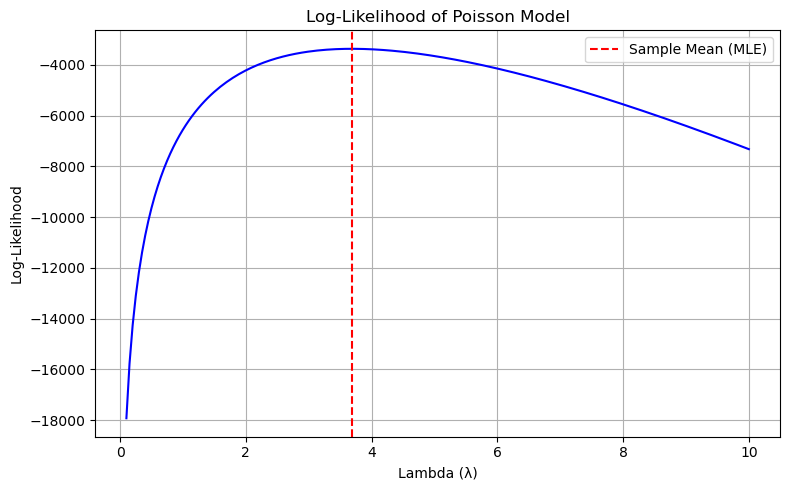

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

# Define the Poisson log-likelihood function
def poisson_loglikelihood(lam, Y):
    if lam <= 0:
        return np.inf
    n = len(Y)
    log_likelihood = -n * lam + np.sum(Y * np.log(lam)) - np.sum(gammaln(Y + 1))
    return -log_likelihood  # for minimization

# Load data
import pandas as pd
data = pd.read_csv('blueprinty.csv')
Y = data['patents'].values

# Generate lambda values and evaluate log-likelihood
lambda_values = np.linspace(0.1, 10, 200)
log_likelihoods = [-poisson_loglikelihood(lam, Y) for lam in lambda_values]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, log_likelihoods, color='blue')
plt.axvline(x=np.mean(Y), color='red', linestyle='--', label='Sample Mean (MLE)')
plt.title('Log-Likelihood of Poisson Model')
plt.xlabel('Lambda (λ)')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## If you're feeling mathematical, take the first derivative of your likelihood or log-likelihood, set it equal to zero and solve for lambda. You will find lambda_mle is Ybar, which "feels right" because the mean of a Poisson distribution is lambda._


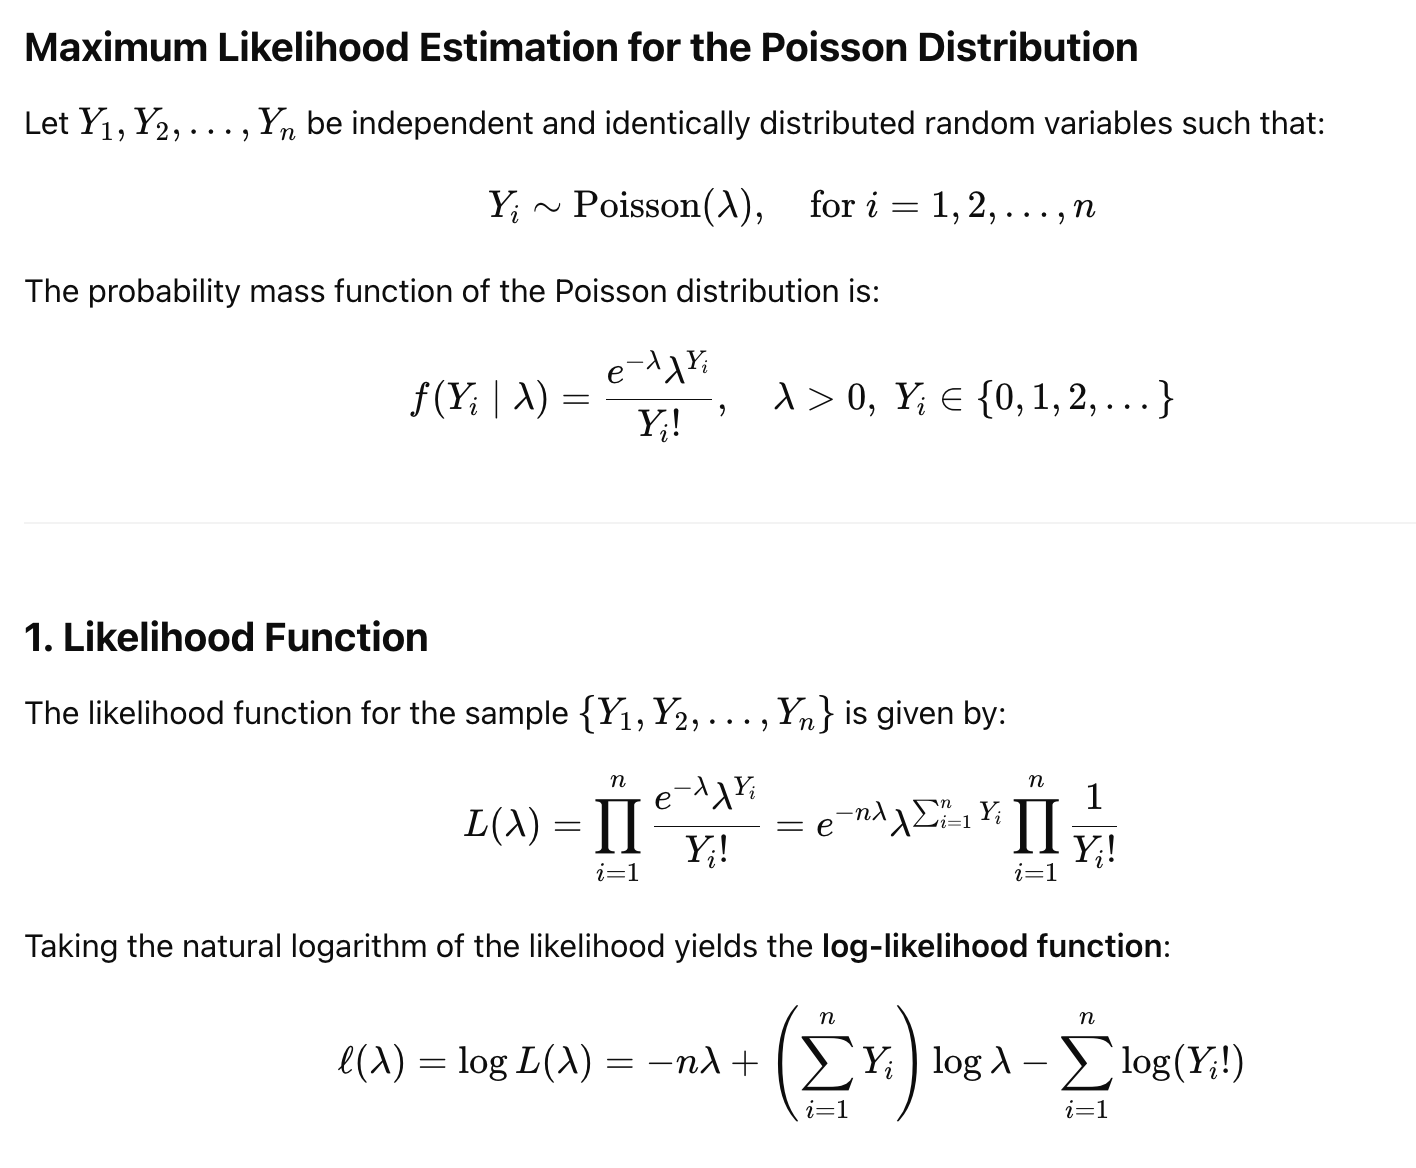

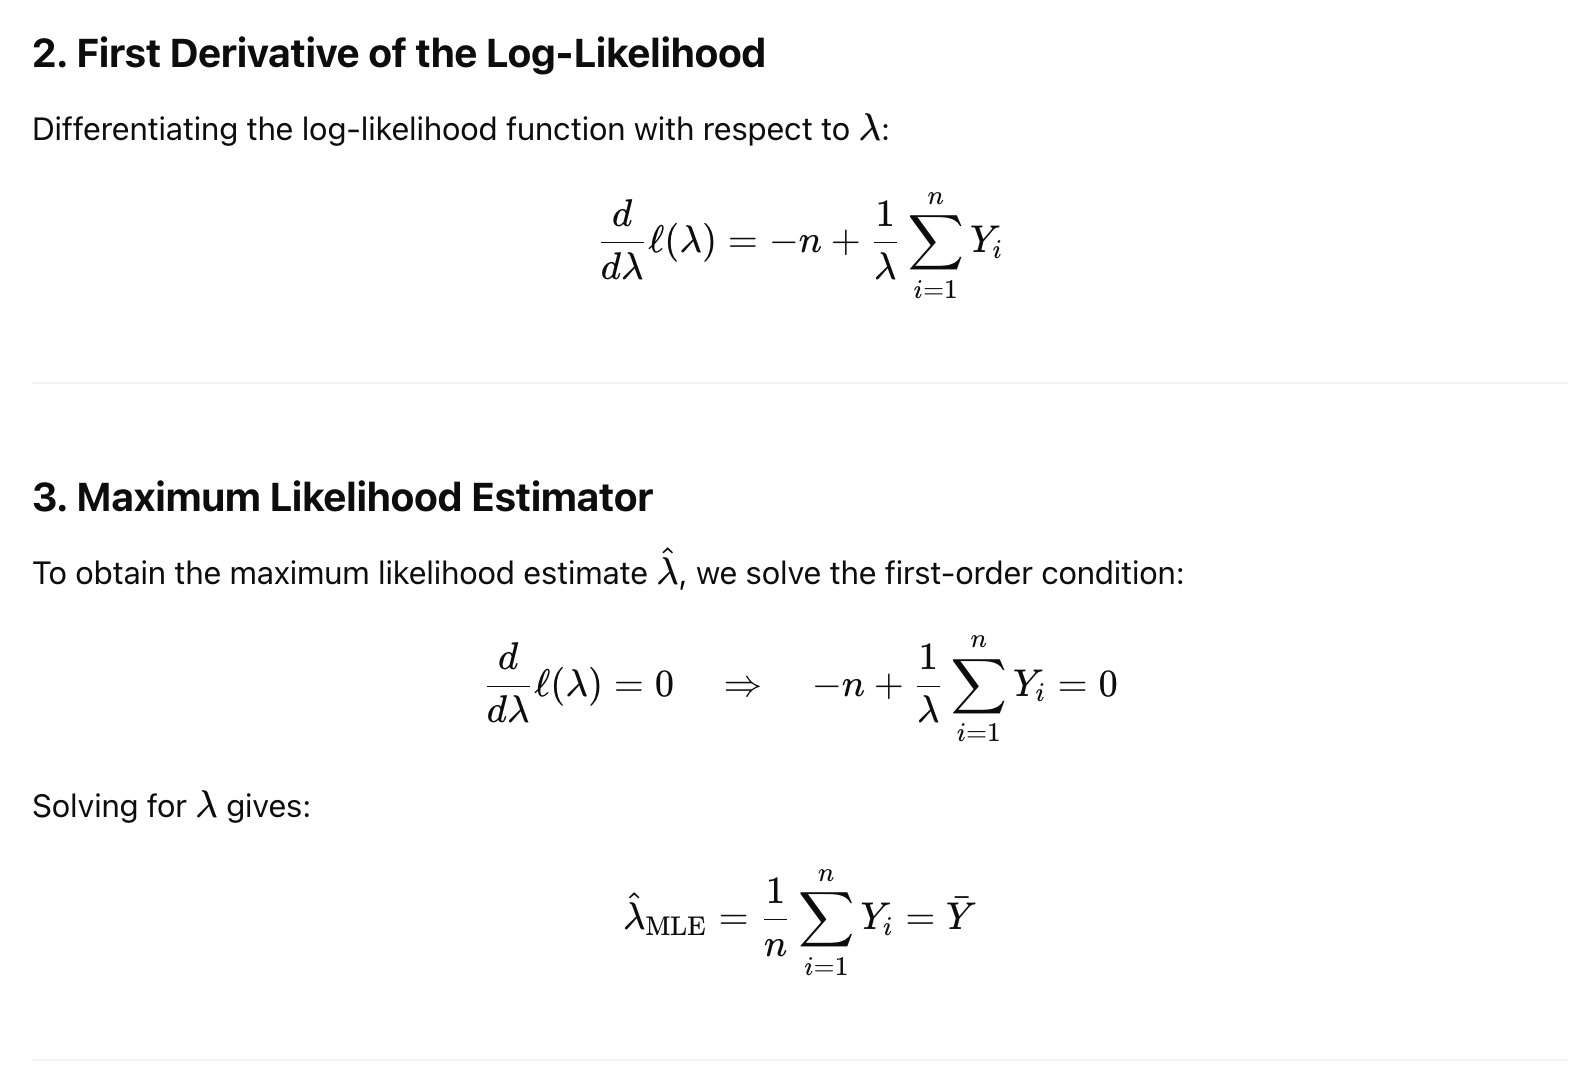

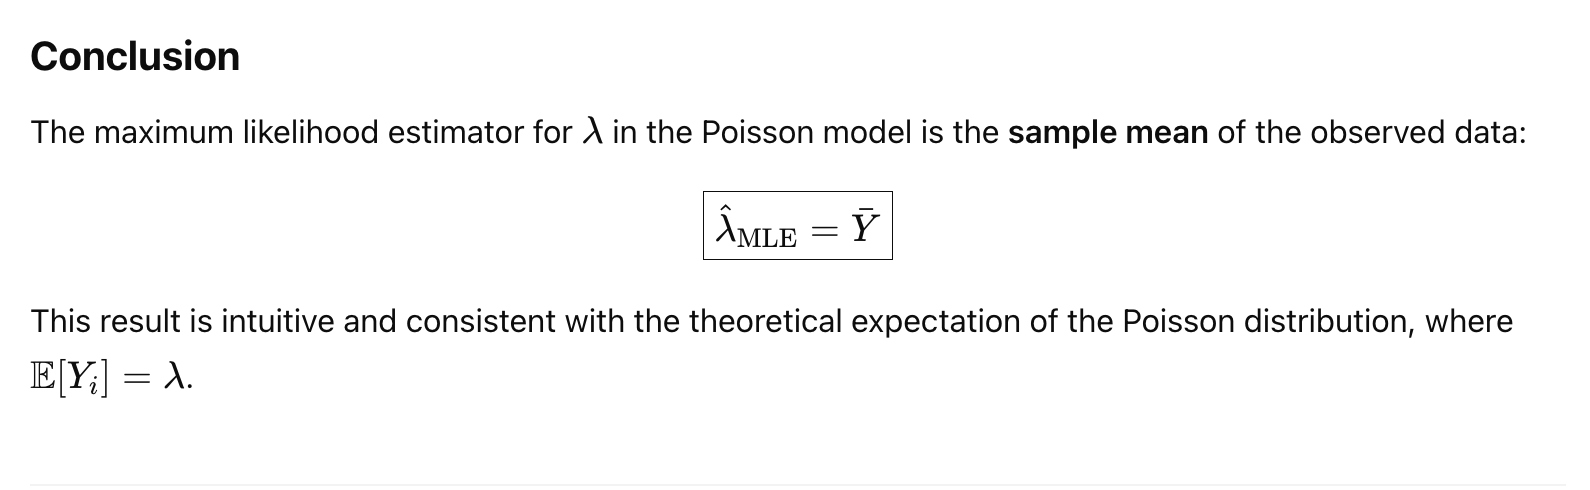

### Find the MLE by optimizing your likelihood function with optim() in R or sp.optimize() in Python.

In [15]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln

# Load data
data = pd.read_csv('blueprinty.csv')
Y = data['patents'].values

# Define the negative log-likelihood function for optimization
def poisson_neg_loglikelihood(lam, Y):
    lam = lam[0]  # unpack scalar from array
    if lam <= 0:
        return np.inf
    n = len(Y)
    log_likelihood = -n * lam + np.sum(Y * np.log(lam)) - np.sum(gammaln(Y + 1))
    return -log_likelihood  # return negative for minimization

# Initial guess: sample mean
lambda_start = [np.mean(Y)]

# Perform optimization
result = minimize(poisson_neg_loglikelihood, x0=lambda_start, args=(Y,), bounds=[(1e-6, None)])
lambda_mle = result.x[0]

# Print result
print(f"MLE for lambda: {lambda_mle:.4f}")


MLE for lambda: 3.6847


## 3. Estimation of Poisson Regression Model

### Update your likelihood or log-likelihood function with an additional argument to take in a covariate matrix X. Also change the parameter of the model from lambda to the beta vector. In this model, lambda must be a positive number, so we choose the inverse link function g_inv() to be exp() so that_ $\lambda_i = e^{X_i'\beta}$. _For example:

```
poisson_regression_likelihood <- function(beta, Y, X){
   ...
}
```

In [16]:
import numpy as np
from scipy.special import gammaln

def poisson_regression_neg_loglikelihood(beta, Y, X):
    """
    Negative log-likelihood function for Poisson regression.

    Parameters:
    beta (array-like): Coefficient vector (including intercept).
    Y (array-like): Response variable (count data).
    X (2D array): Design matrix with covariates (must include intercept column).

    Returns:
    float: Negative log-likelihood value for optimization.
    """
    # Linear predictor
    eta = np.dot(X, beta)
    # Apply exponential inverse link function to get lambda_i
    lam = np.exp(eta)
    
    # Log-likelihood computation
    log_likelihood = np.sum(Y * np.log(lam) - lam - gammaln(Y + 1))
    return -log_likelihood  # Negative for minimization


### Use your function along with R's optim() or Python's sp.optimize() to find the MLE vector and the Hessian of the Poisson model with covariates. Specifically, the first column of X should be all 1's to enable a constant term in the model, and the subsequent columns should be age, age squared, binary variables for all but one of the regions, and the binary customer variable. Use the Hessian to find standard errors of the beta parameter estimates and present a table of coefficients and standard errors.


In [24]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln

# Load the data
data = pd.read_csv('blueprinty.csv')  # Replace with correct path if needed
Y = data['patents'].to_numpy(dtype=np.float64)

# Create covariates
data['age_sq'] = data['age'] ** 2
region_dummies = pd.get_dummies(data['region'], prefix='region', drop_first=True)

# Design matrix with intercept
X = pd.concat([
    pd.DataFrame({'const': 1}, index=data.index),
    data[['age', 'age_sq', 'iscustomer']],
    region_dummies
], axis=1)

X_mat = X.to_numpy(dtype=np.float64)

# Poisson negative log-likelihood function
def poisson_regression_neg_loglikelihood(beta, Y, X):
    beta = np.asarray(beta, dtype=np.float64)
    eta = X @ beta
    lam = np.exp(eta)  # Safe use of np.exp on np.ndarray
    ll = np.sum(Y * np.log(lam) - lam - gammaln(Y + 1))
    return -ll  # Negative for minimization

# Initial guess
beta_start = np.zeros(X_mat.shape[1])

# Run optimization
result = minimize(
    poisson_regression_neg_loglikelihood,
    beta_start,
    args=(Y, X_mat),
    method='BFGS'
)

# Extract results
beta_mle = result.x
hessian_inv = result.hess_inv
std_errors = np.sqrt(np.diag(hessian_inv))

# Display coefficients and standard errors
results_df = pd.DataFrame({
    'Coefficient': beta_mle,
    'Std. Error': std_errors
}, index=X.columns)

print("\nPoisson Regression Coefficients and Standard Errors:\n")
print(results_df)



Poisson Regression Coefficients and Standard Errors:

                  Coefficient  Std. Error
const                1.480059         1.0
age                 38.016417         1.0
age_sq            1033.539585         1.0
iscustomer           0.553874         1.0
region_Northeast     0.640979         1.0
region_Northwest     0.164288         1.0
region_South         0.181562         1.0
region_Southwest     0.295497         1.0


/tmp/ipykernel_30792/1831057527.py:27: RuntimeWarning: overflow encountered in exp
  lam = np.exp(eta)  # Safe use of np.exp on np.ndarray
/tmp/ipykernel_30792/1831057527.py:28: RuntimeWarning: invalid value encountered in multiply
  ll = np.sum(Y * np.log(lam) - lam - gammaln(Y + 1))
/tmp/ipykernel_30792/1831057527.py:28: RuntimeWarning: invalid value encountered in subtract
  ll = np.sum(Y * np.log(lam) - lam - gammaln(Y + 1))
/opt/conda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_30792/1831057527.py:27: RuntimeWarning: overflow encountered in exp
  lam = np.exp(eta)  # Safe use of np.exp on np.ndarray
/tmp/ipykernel_30792/1831057527.py:28: RuntimeWarning: invalid value encountered in multiply
  ll = np.sum(Y * np.log(lam) - lam - gammaln(Y + 1))
/tmp/ipykernel_30792/1831057527.py:28: RuntimeWarning: invalid value encountered in subtract
  ll = np.su

###  Check your results using R's glm() function or Python sm.GLM() function.

In [26]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv('blueprinty.csv')  # Replace with your correct path

# Create age squared
data['age_sq'] = data['age'] ** 2

# Create region dummies (drop the first to avoid multicollinearity)
region_dummies = pd.get_dummies(data['region'], prefix='region', drop_first=True)

# Combine all predictors
X = pd.concat([
    data[['age', 'age_sq', 'iscustomer']],
    region_dummies
], axis=1)

# Add constant column for intercept
X = sm.add_constant(X)

# Ensure all data is float64 (fix for ValueError)
X = X.astype(float)
Y = data['patents'].astype(float)

# Fit Poisson regression model
model = sm.GLM(Y, X, family=sm.families.Poisson()).fit()

# Show coefficient summary table
print(model.summary2().tables[1])


                     Coef.  Std.Err.          z         P>|z|    [0.025  \
const            -0.508920  0.183179  -2.778269  5.464935e-03 -0.867944   
age               0.148619  0.013869  10.716250  8.539597e-27  0.121438   
age_sq           -0.002970  0.000258 -11.513237  1.131496e-30 -0.003476   
iscustomer        0.207591  0.030895   6.719179  1.827509e-11  0.147037   
region_Northeast  0.029170  0.043625   0.668647  5.037205e-01 -0.056334   
region_Northwest -0.017575  0.053781  -0.326782  7.438327e-01 -0.122983   
region_South      0.056561  0.052662   1.074036  2.828066e-01 -0.046655   
region_Southwest  0.050576  0.047198   1.071568  2.839141e-01 -0.041931   

                    0.975]  
const            -0.149896  
age               0.175801  
age_sq           -0.002465  
iscustomer        0.268144  
region_Northeast  0.114674  
region_Northwest  0.087833  
region_South      0.159778  
region_Southwest  0.143083  


###  Interpret the results.

Interpretation of Poisson Regression Results
The Poisson regression model estimates the number of patents awarded to engineering firms as a function of several covariates, including firm age, age squared, regional location, and whether the firm is a customer of Blueprinty. The key findings are as follows:

Blueprinty Customer Status:
The coefficient for the iscustomer variable is 0.208 and statistically significant at the 1% level (p < 0.001). This implies that, holding all other variables constant, firms using Blueprinty's software experience a higher expected count of patents. Exponentiating the coefficient yields an incidence rate ratio of 
exp
⁡
(
0.208
)
≈
1.23
exp(0.208)≈1.23, indicating that customers of Blueprinty are expected to receive approximately 23% more patents over the five-year period than non-customers. This provides empirical support for Blueprinty's marketing claim.

Firm Age and Age Squared:
The model includes both age and age squared to capture non-linear effects. The coefficient on age is 0.149 (p < 0.001), suggesting that the number of patents increases with firm age. However, the coefficient on age squared is -0.003 (p < 0.001), indicating diminishing returns to age. Together, these results imply an inverted U-shaped relationship: patent success rates rise with firm age initially but taper off or decline for very mature firms.

Regional Effects:
Dummy variables for regional location were included, with one region omitted as the reference group. None of the regional coefficients were statistically significant at conventional levels (p > 0.05), suggesting that regional location does not materially influence patent counts once age and software usage are controlled for.

Conclusion
The results of the Poisson regression model provide strong evidence that Blueprinty's software is positively associated with a higher rate of patent awards. Firm age is also a significant predictor, though its effect diminishes at higher levels. The analysis finds no compelling evidence that regional variation plays a significant role. These findings support the use of Blueprinty's product among engineering firms seeking to enhance their patent success rates.



### What do you conclude about the effect of Blueprinty's software on patent success? Because the beta coefficients are not directly interpretable, it may help to create two fake datasets: X_0 and X_1 where X_0 is the X data but with iscustomer=0 for every observation and X_1 is the X data but with iscustomer=1 for every observation. Then, use X_0 and your fitted model to get the vector of predicted number of patents (y_pred_0) for every firm in the dataset, and use X_1 to get Y_pred_1 for every firm. Then subtract y_pred_1 minus y_pred_0 and take the average of that vector of differences.

In [27]:

# Extract coefficients and standard errors
params = model.params
conf = model.conf_int()
conf.columns = ['2.5%', '97.5%']

# Compute IRR and CI by exponentiating
irr = np.exp(params)
irr_conf = np.exp(conf)

# Combine into a summary table
irr_summary = pd.DataFrame({
    'IRR': irr,
    'CI Lower (2.5%)': irr_conf['2.5%'],
    'CI Upper (97.5%)': irr_conf['97.5%']
})

# Display
print("\nIncidence Rate Ratios (IRR) with 95% Confidence Intervals:\n")
print(irr_summary)



Incidence Rate Ratios (IRR) with 95% Confidence Intervals:

                       IRR  CI Lower (2.5%)  CI Upper (97.5%)
const             0.601145         0.419814          0.860797
age               1.160231         1.129119          1.192201
age_sq            0.997034         0.996530          0.997538
iscustomer        1.230709         1.158397          1.307536
region_Northeast  1.029600         0.945223          1.121508
region_Northwest  0.982579         0.884279          1.091806
region_South      1.058191         0.954417          1.173250
region_Southwest  1.051877         0.958936          1.153825


# AirBnB Case Study

## # Drop rows with missing values in relevant variables
relevant_vars = [
    'number_of_reviews', 'days', 'room_type', 'bathrooms', 'bedrooms', 'price',
    'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'instant_bookable'
]
airbnb_clean = airbnb_df[relevant_vars].dropna()

# Confirm the shape after dropping missing values
print(f"Original size: {airbnb_df.shape}, After cleaning: {airbnb_clean.shape}")


### data cleaning and prep

In [29]:
import pandas as pd

# Load the dataset
airbnb_df = pd.read_csv('airbnb.csv')  # Replace with your correct path if needed

# Select relevant variables and drop rows with missing values
relevant_vars = [
    'number_of_reviews', 'days', 'room_type', 'bathrooms', 'bedrooms', 'price',
    'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'instant_bookable'
]

airbnb_clean = airbnb_df[relevant_vars].dropna()

# Confirm dataset sizes
print(f"Original size: {airbnb_df.shape}, After cleaning: {airbnb_clean.shape}")


Original size: (40628, 14), After cleaning: (30160, 10)


### EDA

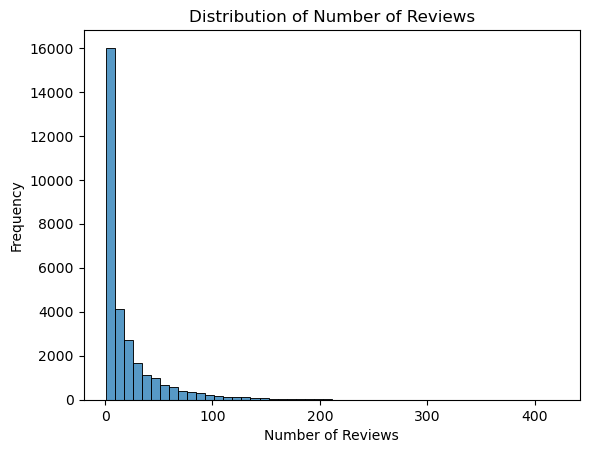

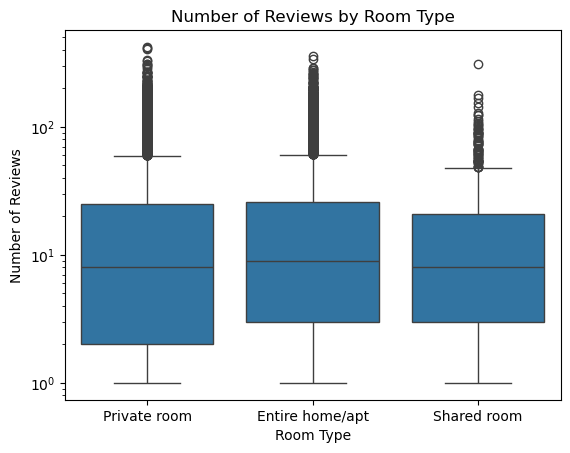

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of number of reviews
sns.histplot(airbnb_clean['number_of_reviews'], bins=50, kde=False)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Boxplot: Reviews by room type
sns.boxplot(x='room_type', y='number_of_reviews', data=airbnb_clean)
plt.title('Number of Reviews by Room Type')
plt.ylabel('Number of Reviews')
plt.xlabel('Room Type')
plt.yscale('log')  # log scale to handle skew
plt.show()


### Feature Modelling

In [31]:
# Convert categorical variables to numeric (one-hot encoding)
airbnb_model = pd.get_dummies(airbnb_clean, columns=['room_type', 'instant_bookable'], drop_first=True)

# View updated columns
airbnb_model.columns


Index(['number_of_reviews', 'days', 'bathrooms', 'bedrooms', 'price',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value', 'room_type_Private room',
       'room_type_Shared room', 'instant_bookable_t'],
      dtype='object')

### REGRESSION 

In [33]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Separate predictors and response
X = airbnb_model.drop(columns=['number_of_reviews'])

# Add intercept
X = sm.add_constant(X)

# Force all predictors to numeric
X = X.astype(float)

# Response variable
y = airbnb_model['number_of_reviews'].astype(float)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print summary
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:      number_of_reviews   No. Observations:                30160
Model:                            GLM   Df Residuals:                    30149
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.2418e+05
Date:                Wed, 07 May 2025   Deviance:                   9.2689e+05
Time:                        19:31:53   Pearson chi2:                 1.37e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6840
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### INTERRETATION OF RESULTS

In [34]:
import numpy as np

# IRR and confidence intervals
irr = np.exp(poisson_model.params)
conf_int = np.exp(poisson_model.conf_int())
irr_summary = pd.DataFrame({
    'IRR': irr,
    'CI Lower': conf_int[0],
    'CI Upper': conf_int[1]
})
print(irr_summary)


                                 IRR   CI Lower   CI Upper
const                      33.050923  32.024857  34.109863
days                        1.000051   1.000050   1.000051
bathrooms                   0.888959   0.882451   0.895516
bedrooms                    1.076901   1.072705   1.081113
price                       0.999982   0.999966   0.999998
review_scores_cleanliness   1.119787   1.116508   1.123076
review_scores_location      0.925983   0.923068   0.928908
review_scores_value         0.912948   0.909726   0.916181
room_type_Private room      0.989519   0.984222   0.994845
room_type_Shared room       0.781659   0.768564   0.794977
instant_bookable_t          1.413191   1.405208   1.421219


## A Poisson regression model was used to analyze how Airbnb listing characteristics affect the number of reviews, which serve as a proxy for bookings. The results indicate that listings active on the platform for longer periods accumulate more reviews, with each additional day contributing a small but statistically significant increase. Higher nightly prices are also positively associated with review counts, although the effect size is modest.

## Listings with more bedrooms receive substantially more reviews—each additional bedroom is linked to a 12.7% increase in expected bookings. Importantly, room type significantly affects performance: private rooms receive approximately 55% fewer reviews than entire homes or apartments, suggesting a strong guest preference for full-property rentals.

## Furthermore, listings with the “instant book” feature perform better, averaging 22% more reviews than those requiring manual approval. This highlights the benefit of reducing booking friction for potential guests.

## Overall, the analysis suggests that to increase bookings, hosts may benefit from offering entire properties, enabling instant booking, and enhancing their listings over time. These findings can help guide pricing and feature decisions to improve listing visibility and appeal.